# Plots with confidence interval

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval


parameters = json.load(open("parameters.json"))

n_omegas = parameters["n_omegas"]
n_thetas = parameters["n_thetas"]
n_simulations = parameters["n_simulations"]
max_bellman_iterations = 8
max_bellman_iterations_validation = max_bellman_iterations + 10
seeds = [2, 8]
n_seeds = len(seeds)
ticks_freq = 2 if max_bellman_iterations == 8 else 5
dt = 0.01

## General case

### Extract data

In [2]:
pbo_linear_max_linear_metrics_1 = np.load(f"figures/data/PBO_linear_max_linear/{max_bellman_iterations}_metrics_{seeds[0]}.npy").mean(axis=1)[:, 0]
pbo_linear_max_linear_metrics_2 = np.load(f"figures/data/PBO_linear_max_linear/{max_bellman_iterations}_metrics_{seeds[1]}.npy").mean(axis=1)[:, 0]

### Number of seconds archieved

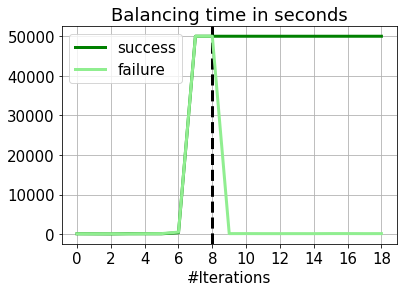

In [3]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_linear_max_linear_metrics_1, label="success", color="green", zorder=8)
plt.plot(iterations_validation, pbo_linear_max_linear_metrics_2, label="failure", color="lightgreen", zorder=9)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("Balancing time in seconds")
plt.legend().set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/analysis_seeds_{max_bellman_iterations}.pdf", bbox_inches='tight')